In [ ]:
#Question 1

In [28]:
import pandas as pd
import urllib.request
import json
import pickle
import matplotlib.pyplot as plt

In [14]:
url = 'https://www.saferproducts.gov/RestWebServices/Recall'
query = '?format=json&RecallTitle=Gas'
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close() 
with open('json_data.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
#Question 2

In [15]:
df = pd.DataFrame.from_dict(data)
print(df.shape)
df.head()

(216, 22)


,RecallID,RecallNumber,RecallDate,Description,URL,Title,ConsumerContact,LastPublishDate,Products,Inconjunctions,...,Manufacturers,Retailers,Importers,Distributors,SoldAtLabel,ManufacturerCountries,ProductUPCs,Hazards,Remedies,RemedyOptions
0,10024,24329,2024-08-01T00:00:00,This recall involves two ECHO 59.7cc gas-power...,https://www.cpsc.gov/Recalls/2024/ECHO-Recalls...,ECHO Recalls Gas-Powered Backpack Blowers Due ...,ECHO at 800-432-3246 from 8 a.m. to 4:30 p.m. ...,2024-08-01T00:00:00,"[{'Name': 'ECHO gas-powered backpack blowers',...",[],...,"[{'Name': 'ECHO Inc., of Lake Zurich, Illinois...","[{'Name': 'Golden Eagle Distributing Company, ...",[],[],None,[{'Country': 'United States'}],[],"[{'Name': 'The fuel supply line can leak gas, ...",[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Repair'}]
1,10004,24303,2024-07-11T00:00:00,This recall involves TonGass 8-inch round pool...,https://www.cpsc.gov/Recalls/2024/TonGass-Pool...,TonGass Pool Drain Covers Recalled Due to Viol...,"TonGass email at tongass@126.com, online at Am...",2024-07-11T00:00:00,"[{'Name': 'TonGass pool drain covers', 'Descri...",[],...,[],[{'Name': 'Exclusively online at www.amazon.co...,"[{'Name': 'Oneida International Ltd., dba TonG...",[],None,[{'Country': 'China'}],[],[{'Name': 'The recalled drain covers do not co...,[{'Name': 'Pool owners/operators and consumers...,[{'Option': 'Refund'}]
2,9926,24201,2024-04-18T00:00:00,This recall involves Gasaciods children's mult...,https://www.cpsc.gov/Recalls/2024/Gasaciods-Ch...,Gasaciods Children's Helmets Recalled Due to R...,Fengwang Sports via email at george66305@163.c...,2024-04-18T00:00:00,[{'Name': 'Gasaciods Children's Multi-Purpose ...,[],...,[],[{'Name': 'Online at Temu.com from July 2023 t...,[{'Name': 'Dongguan Feng Wang Sports Goods Co....,[],None,[{'Country': 'China'}],[],[{'Name': 'The helmets do not comply with the ...,[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Refund'}]
3,9927,24202,2024-04-18T00:00:00,This recall involves 750mL and 1500mL sizes of...,https://www.cpsc.gov/Recalls/2024/Randder-Liqu...,Randder Liquid Fuel Bottles Recalled Due to Ri...,"Email at catherine0216@outlook.com, or online ...",2024-04-18T00:00:00,[{'Name': 'Randder 2-Pack Liquid Fuel Bottles'...,[],...,[],[{'Name': 'Amazon.com from September 2022 thro...,[],[{'Name': 'Shenzhenshi Rande Keji Youxian Gong...,None,[{'Country': 'China'}],[],[{'Name': 'The portable fuel containers do not...,[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Repair'}]
4,9918,24192,2024-04-11T00:00:00,This recall involves BRS portable liquid fuel ...,https://www.cpsc.gov/Recalls/2024/BRS-Liquid-F...,BRS Liquid Fuel Bottles Recalled Due to Risk o...,"Email at chencaiyu1994@hotmail.com, or online ...",2024-04-11T00:00:00,"[{'Name': 'BRS Liquid Fuel Bottles', 'Descript...",[],...,[],[{'Name': 'Amazon.com from October 2018 throug...,[],"[{'Name': 'Huenco, of China', 'CompanyID': ''}]",None,[{'Country': 'China'}],[],[{'Name': 'The portable fuel bottles do not me...,[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Refund'}]


In [21]:
temp = df['ManufacturerCountries']
clean_values = []
for i in range(len(temp)):
    if len(temp[i])==1 :
        clean_values.append( str(temp[i][0]['Country']) )
    elif len(temp[i])>1:
        countries = []
        for j in range(len(temp[i])):
            countries.append( temp[i][j]['Country'] )
        clean_values.append( str(countries) )
    else:
        clean_values.append('')
df['mnf_country'] = clean_values
df['mnf_country'].value_counts()

mnf_country
United States                             61
China                                     53
                                          49
Canada                                    12
Mexico                                     9
Taiwan                                     8
['China', 'Hong Kong']                     4
Austria                                    2
Japan                                      2
['China', 'Hong Kong', 'South Africa']     2
Germany                                    2
['Canada (heater)', 'Mexico (valve)']      1
Romania                                    1
Belgium                                    1
Israel                                     1
['Taiwan', 'United States']                1
India                                      1
South Korea                                1
Czech Republic                             1
Costa Rica                                 1
Italy                                      1
['China', 'Thailand']                      

In [ ]:
#Question 3

In [22]:
def flatten(var):
    """ Flattens a value, recursively concatenating dictionary values. """
    temp = df[var] # Get column from the dataframe
    clean_values = [] # List for new values
    key = [*temp[0][0]][0] # Get dictionary key
    for i in range(len(temp)):
        if len(temp[i])==1 : # Only one entry in the value
            clean_values.append( str(temp[i][0][key]) ) # Convert to string and append
        elif len(temp[i])>1: # Multiple entries in the value to flatten
            new_values = [] # List for flattened entries
            for j in range(len(temp[i])): # Iterate over the dictionary
                new_values.append( temp[i][j][key] ) # For the key, append values
            clean_values.append(str(new_values) ) # Convert to string from list and append
        else:
            clean_values.append('') # Missing values get a blank
    return clean_values

<Axes: >

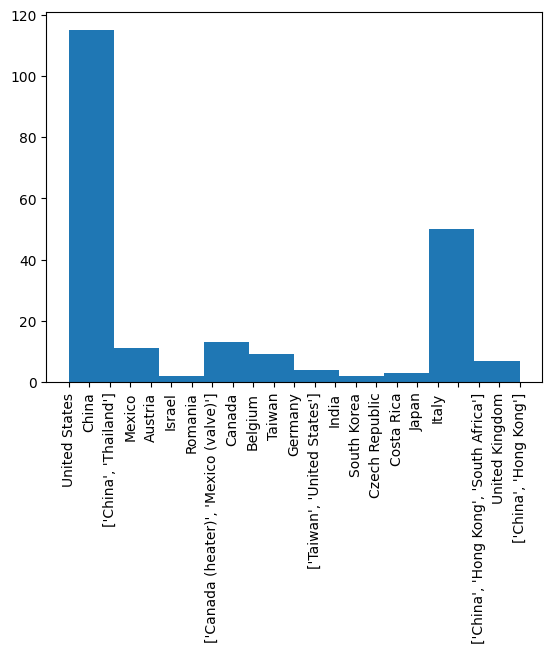

In [27]:
df['mnf_country'] = flatten('ManufacturerCountries')
df['mnf_country'].value_counts()
df['mnf_country'].hist(grid=False,xrot=90)

In [ ]:
#Question 5 

In [36]:
import requests
import urllib.request
import json

url = 'https://data.lacity.org/resource/2nrs-mtv8.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.to_csv('LA_Crime.csv', index=False)  # index=False to avoid writing row numbers
print(df.shape)
print(df.head())


(1000, 27)
       dr_no                date_rptd                 date_occ time_occ area  \
0  190326475  2020-03-01T00:00:00.000  2020-03-01T00:00:00.000     2130   07   
1  200106753  2020-02-09T00:00:00.000  2020-02-08T00:00:00.000     1800   01   
2  200320258  2020-11-11T00:00:00.000  2020-11-04T00:00:00.000     1700   03   
3  200907217  2023-05-10T00:00:00.000  2020-03-10T00:00:00.000     2037   09   
4  220614831  2022-08-18T00:00:00.000  2020-08-17T00:00:00.000     1200   06   

   area_name rpt_dist_no part_1_2 crm_cd  \
0   Wilshire        0784        1    510   
1    Central        0182        1    330   
2  Southwest        0356        1    480   
3   Van Nuys        0964        1    343   
4  Hollywood        0666        2    354   

                                crm_cd_desc  ... crm_cd_1 crm_cd_2  \
0                          VEHICLE - STOLEN  ...      510      998   
1                     BURGLARY FROM VEHICLE  ...      330      998   
2                             BIK

In [ ]:
# I had a lot of trouble finding the correct API endpoint link for the above data, and subsquently 